<center><b><h1>Stock Market Technical Analysis</h1></b></center>
<center><h2>Algorithmic Approach</h2></center>
<center><h2>for</h2></center>
<center><h2>Investing in the Stock Market</h2></center>
<center><h2>using Python</h2></center>
<br>
<center><h1>Miguel Secillano</h1></center>
<center><h3>(2021/22 Science Fair Project)</h3></center>

<center><b><h1>---- <del>Single Stock</del> S&P 500 Index Notebook ----</h1></b></center>
<center><h2>(initial experimentation)</h2></center>

In [27]:
import yfinance as yf                               # this is the Yahoo Finance API for Python
# https://pypi.org/project/yfinance/                  yfinance documentation
# https://www.youtube.com/watch?v=gnUKkS964WQ         How do I remove columns from a pandas DataFrame?
# https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y           Data Analysis in Python with Pandas
# https://www.youtube.com/watch?v=nH1gw-slnOo         Create New Column
import pandas as pd                                 # this is the Database/Dataframe utilities for Python
import matplotlib.pyplot as plt                     # this is the Ploting routines for Python

plt.style.use('seaborn')                            # this defines the styles of tyhe plots

In [28]:
#%%
%reload_ext autoreload
%autoreload 2

In [29]:
# Helper Functions
def list_dictionary_pairs(dict):
    print_stock_symbol_name(dict)
    for key,value in dict.items():
        print(key,':',value)
        
def print_stock_symbol_name(dict):
    print(dict['symbol']+':',dict['shortName'])
    print('='*40)
    
def get_historial_data(ticker):
    return ticker.history(period='max')

In [30]:
# ^GSPC     s&p 500 symbol
# ^DJI      dow jones inductrial average
stock_ticker = yf.Ticker('^GSPC')
stock_info =stock_ticker.info

In [31]:
stock_info =stock_ticker.info
list_dictionary_pairs(stock_info)

^GSPC: S&P 500
exchange : SNP
shortName : S&P 500
exchangeTimezoneName : America/New_York
exchangeTimezoneShortName : EDT
isEsgPopulated : False
gmtOffSetMilliseconds : -14400000
quoteType : INDEX
symbol : ^GSPC
messageBoardId : finmb_INDEXGSPC
market : us_market
previousClose : 4458.58
regularMarketOpen : 4474.81
twoHundredDayAverage : 4222.7896
trailingAnnualDividendYield : None
payoutRatio : None
volume24Hr : None
regularMarketDayHigh : 4492.99
navPrice : None
averageDailyVolume10Day : 2948447500
totalAssets : None
regularMarketPreviousClose : 4458.58
fiftyDayAverage : 4458.874
trailingAnnualDividendRate : None
open : 4474.81
toCurrency : None
averageVolume10days : 2948447500
expireDate : None
yield : None
algorithm : None
dividendRate : None
exDividendDate : None
beta : None
circulatingSupply : None
startDate : None
regularMarketDayLow : 4445.7
priceHint : 2
currency : USD
regularMarketVolume : 2065690000
lastMarket : None
maxSupply : None
openInterest : None
marketCap : None
volum

In [32]:
df_history = get_historial_data(stock_ticker)      # returns a Pandas Dataframe
print(type(df_history))

<class 'pandas.core.frame.DataFrame'>


In [33]:
print(df_history)

                   Open         High          Low        Close      Volume  \
Date                                                                         
1927-12-30    17.660000    17.660000    17.660000    17.660000           0   
1928-01-03    17.760000    17.760000    17.760000    17.760000           0   
1928-01-04    17.719999    17.719999    17.719999    17.719999           0   
1928-01-05    17.549999    17.549999    17.549999    17.549999           0   
1928-01-06    17.660000    17.660000    17.660000    17.660000           0   
...                 ...          ...          ...          ...         ...   
2021-09-07  4535.379883  4535.379883  4513.000000  4520.029785  3098870000   
2021-09-08  4518.089844  4521.790039  4493.950195  4514.069824  2808480000   
2021-09-09  4513.020020  4529.899902  4492.069824  4493.279785  3035300000   
2021-09-10  4506.919922  4520.470215  4457.660156  4458.580078  2851140000   
2021-09-13  4474.810059  4492.990234  4445.700195  4468.729980  

In [34]:
df_history.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23537 entries, 1927-12-30 to 2021-09-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          23537 non-null  float64
 1   High          23537 non-null  float64
 2   Low           23537 non-null  float64
 3   Close         23537 non-null  float64
 4   Volume        23537 non-null  int64  
 5   Dividends     23537 non-null  int64  
 6   Stock Splits  23537 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.4 MB


In [35]:
# Set the date as the index of the data frame
# df_history = df_history.set_index(pd.DatetimeIndex(df_history['Date']))
df_history.columns
# df_history = df_history.set_index(pd.DatetimeIndex(df_history.columns[1]))
# df_history.to_csv('sp500.cvs', index=True)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [36]:
df_history.drop('Dividends', axis =1, inplace = True)
df_history.drop('Stock Splits', axis =1, inplace = True)

df_history.columns
# df_history.to_csv('sp500.cvs', index=True)

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [37]:
df_history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [38]:
# daily_return = df_history.pct_change(1)
daily_return = df_history['Close'].pct_change(1)

In [39]:
daily_return

Date
1927-12-30         NaN
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
                ...   
2021-09-07   -0.003396
2021-09-08   -0.001319
2021-09-09   -0.004606
2021-09-10   -0.007723
2021-09-13    0.002276
Name: Close, Length: 23537, dtype: float64

In [40]:
df_history['Daily Return']= daily_return

In [41]:
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...
2021-09-07,4535.379883,4535.379883,4513.000000,4520.029785,3098870000,-0.003396
2021-09-08,4518.089844,4521.790039,4493.950195,4514.069824,2808480000,-0.001319
2021-09-09,4513.020020,4529.899902,4492.069824,4493.279785,3035300000,-0.004606


In [42]:
df_history = df_history[1:]          # remove row 0
df_history

,Open,High,Low,Close,Volume,Daily Return
Date,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,0.006268
1928-01-09,17.500000,17.500000,17.500000,17.500000,0,-0.009060
...,...,...,...,...,...,...
2021-09-07,4535.379883,4535.379883,4513.000000,4520.029785,3098870000,-0.003396
2021-09-08,4518.089844,4521.790039,4493.950195,4514.069824,2808480000,-0.001319
2021-09-09,4513.020020,4529.899902,4492.069824,4493.279785,3035300000,-0.004606


In [43]:
i = 23531
print(str(df_history.index[i]))
print(df_history['Daily Return'][i])
month = str(df_history.index[i]).split('-')[1]
print(month)    # o is Year    1 is Month      2 is day with time
print(int(month))
print(len(df_history))

2021-09-07 00:00:00
-0.003395574405981705
09
9
23536


In [44]:
daily_return_rate = []
monthly_return_rate = {'01':0,'02':0,'03':0,'04':0,'05':0,'06':0,
                       '07':0,'08':0,'09':0,'10':0,'11':0,'12':0}
sum=0
for i in range(0,len(df_history-1)):
    month=str(df_history.index[i]).split('-')[1]
    drr = df_history['Daily Return'][i]
    daily_return_rate.append((month,drr))
    monthly_return_rate[month]=monthly_return_rate[month]+drr
    if i<=20:
        sum+=float(monthly_return_rate[month])
        print(sum)
print('\n',20,daily_return_rate[20],'\n')   
print('\n',sum,'\n')   
    
n = 0

for drr in daily_return_rate:
    print(n,drr)
    n+=1
    
# print(monthly_return_rate['01'], '\n\n')
# print(monthly_return_rate)

0.005662535805988744
0.009072767838788742
0.002889315736069209
0.0029737049515004
-0.006001919921095444
-0.022406068266068502
-0.03996165338693958
-0.050600873709748306
-0.054943550548008924
-0.07578218924276858
-0.09604255604604295
-0.11861500434889471
-0.13423502331840464
-0.14410128013034984
-0.14481422735407068
-0.14155893777244932
-0.14903197323493067
-0.1502265440781838
-0.14801774701745318
-0.15711481524227766
-0.16163784545949966

 20 ('01', 0.004574038007602477) 


 -0.16163784545949966 

0 ('01', 0.005662535805988744)
1 ('01', -0.0022523037731887463)
2 ('01', -0.009593684135519531)
3 ('01', 0.006267841318150724)
4 ('01', -0.009060014088027035)
5 ('01', -0.007428523472377213)
6 ('01', -0.0011514367758980182)
7 ('01', 0.006916364798062347)
8 ('01', 0.006296543484548112)
9 ('01', -0.016495961856499042)
10 ('01', 0.0005782718914852936)
11 ('01', -0.002312081499577401)
12 ('01', 0.006952429333341836)
13 ('01', 0.005753762157564735)
14 ('01', 0.009153309588224356)
15 ('01', 0.00396

In [45]:
print('01',monthly_return_rate['01'], '\n')
print(type(daily_return_rate))
print(monthly_return_rate)

01 1.1401213977701072 

<class 'list'>
{'01': 1.1401213977701072, '02': -0.06886602780141293, '03': 0.45518719239995975, '04': 1.3217151761502346, '05': -0.07730973962063203, '06': 0.7349681106642892, '07': 1.4648312601589217, '08': 0.6533595640734299, '09': -0.978707175002052, '10': 0.486550017398222, '11': 0.8192954241753544, '12': 1.2724005008379928}


In [46]:
for key,value in monthly_return_rate.items():
    print(key,value)

01 1.1401213977701072
02 -0.06886602780141293
03 0.45518719239995975
04 1.3217151761502346
05 -0.07730973962063203
06 0.7349681106642892
07 1.4648312601589217
08 0.6533595640734299
09 -0.978707175002052
10 0.486550017398222
11 0.8192954241753544
12 1.2724005008379928


In [47]:
# for key,value in monthly_return_rate.items():
#     print(key,value/365)

In [48]:
print(len(monthly_return_rate))
print(monthly_return_rate.items())

12
dict_items([('01', 1.1401213977701072), ('02', -0.06886602780141293), ('03', 0.45518719239995975), ('04', 1.3217151761502346), ('05', -0.07730973962063203), ('06', 0.7349681106642892), ('07', 1.4648312601589217), ('08', 0.6533595640734299), ('09', -0.978707175002052), ('10', 0.486550017398222), ('11', 0.8192954241753544), ('12', 1.2724005008379928)])


<BarContainer object of 12 artists>

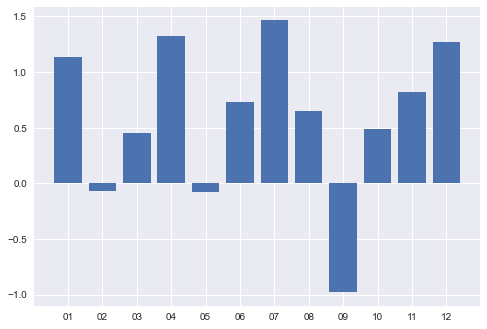

In [49]:
data = monthly_return_rate
names = list(data.keys())
values = list(data.values())
plt.bar(range(len(data)), values, tick_label=names)